### Importing the Libraries

In [46]:
import pandas as pd
import numpy as np
import random
import seaborn as sns

### Problem 1.1

In [11]:
# Given Transition Matrix
P = np.array([[1/2,1/4,1/5],[1/3,1/2,2/5],[1/6,1/4,2/5]])
today = np.array([1/2,1/4,1/5])
day_after_tomorrow = np.round(np.dot(np.dot(P,P),today),3)

In [13]:
print(f"Probability of Day after tomorrow being Sunny is:{day_after_tomorrow[0]}")
print(f"Probability of Day after tomorrow being Overcast is:{day_after_tomorrow[1]}")
print(f"Probability of Day after tomorrow being Rainy is:{day_after_tomorrow[2]}")

Probability of Day after tomorrow being Sunny is:0.314
Probability of Day after tomorrow being Overcast is:0.394
Probability of Day after tomorrow being Rainy is:0.242


### Problem 1.2

In [91]:
# Finding the eigen values and eigen vectors for the matrix P
eigs, eigen=np.linalg.eig(P) #Every column is a eigen vector in eigen variable

# For a stochastic matrix, the invariant measure is the eigenvector corresponding to eigenvalue 1
inv_meas=eigen[:,0]/(np.sum(eigen[:,0])) # Dividing it is necessary to have the probabilities sum up to 1

print(f"Invariant Measure for the given transition matrix is: {inv_meas}")
# We separate the invariant measure to be used in the next question
inv_sunny, inv_overcast, inv_rainy = inv_meas

Invariant Measure for the given transition matrix is: [0.31578947 0.42105263 0.26315789]


### Problem 1.3

In [92]:
# Transition probabilities
transition_probs = {
    'Sunny': {'Sunny': 1/2, 'Rainy': 1/3, 'Overcast': 1/6},
    'Overcast': {'Sunny': 1/4, 'Rainy': 1/2, 'Overcast': 1/4},
    'Rainy': {'Sunny': 1/5, 'Rainy': 2/5, 'Overcast': 2/5}
}

# Number of Parallel Simulations
num_sims = 190

# Start state
current_state = 'Sunny'

# Simulation for 30 days
num_days = 30
chain = []

# Aggregating the count of weather type for a day 
daily_weather_counter = {f"Day {i}":{} for i in range(1,num_days+1)}


for i in range(1, num_days+1):
    parallel_sims_weather_counter = {"Sunny":0,"Overcast":0,"Rainy":0}
    for _ in range(num_sims):
        # Get the transition probabilities for the current state
        transition_probs_current = transition_probs[current_state]

        # Get the possible next states
        next_states = list(transition_probs_current.keys())

        # Get the probabilities for the next states
        probabilities = list(transition_probs_current.values())

        # Sample the next state based on the probabilities
        next_state = random.choices(next_states, probabilities)[0]
        parallel_sims_weather_counter[next_state] += 1

        # Update the current state
        current_state = next_state

        # Append the current state to the chain
        chain.append(current_state)
    
    # Storing the dictionary in a array Day wise
    keys = ["Sunny","Overcast","Rainy"]
    parallel_sims_weather_counter = np.apply_along_axis(lambda x: x / 190, 0, list(parallel_sims_weather_counter.values()))
    parallel_sims_weather_counter = {key: value for key, value in zip(keys, parallel_sims_weather_counter)}
    daily_weather_counter[f"Day {i}"].update(parallel_sims_weather_counter)

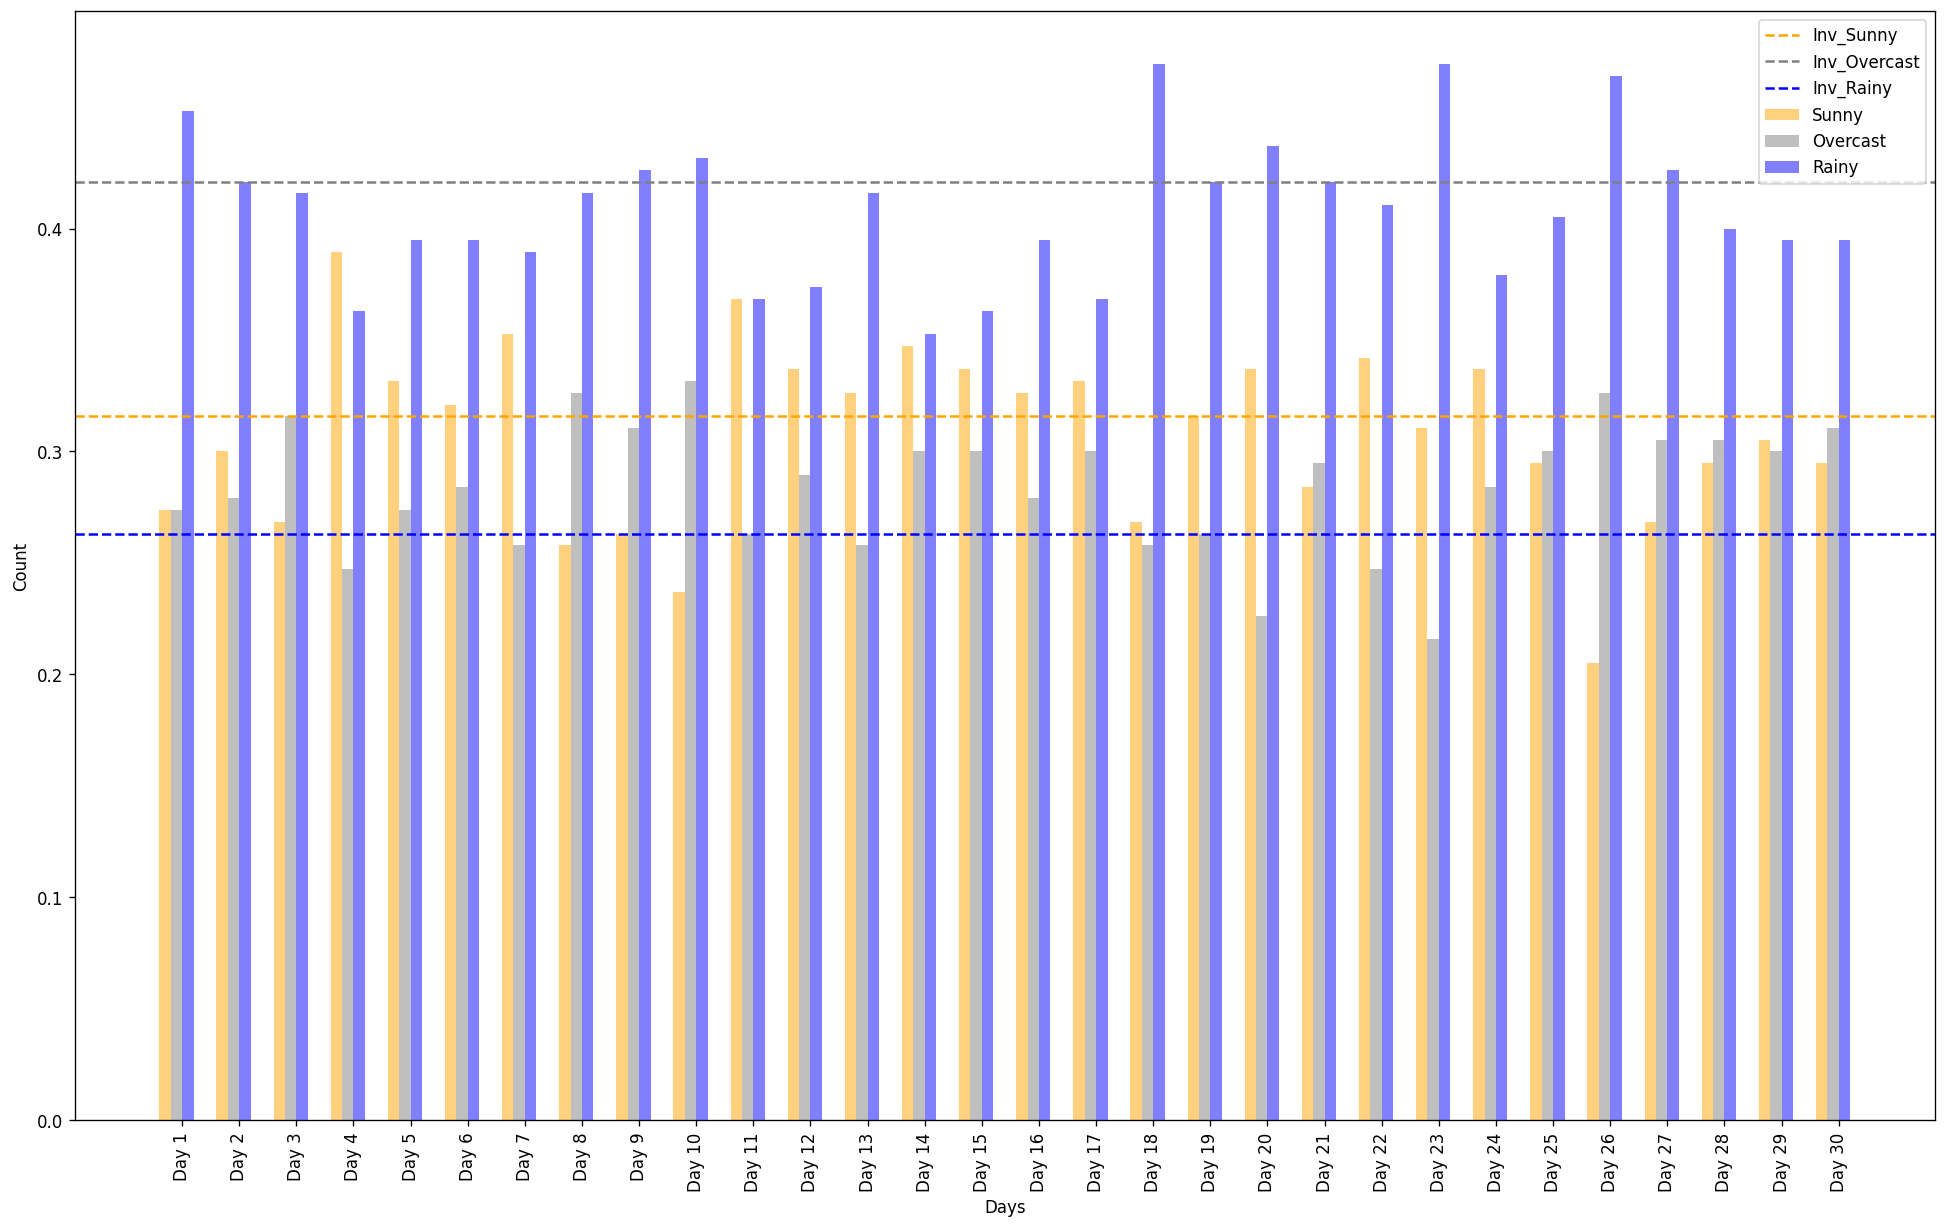

In [93]:
import numpy as np
import matplotlib.pyplot as plt

data = daily_weather_counter

# Extract the labels (Sunny, Rainy, Overcast)
labels = list(data['Day 1'].keys())

# Create an array of x-coordinates for each day
x = np.arange(len(data))

# Set the width of each bar
bar_width = 0.2

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12), dpi=120)

# Define the custom color palette for each weather category
color_palette = ['orange', 'grey', 'blue']

# Iterate over each weather category
for i, weather in enumerate(labels):
    # Get the counts for the current weather category
    counts = [day[weather] for i, day in enumerate(data.values())]

    # Calculate the x-positions for the bars
    x_pos = x + (i * bar_width) - (bar_width * len(labels) / 2)

    # Plot the histogram for the current weather category with the corresponding color
    ax.bar(x_pos, counts, width=bar_width, alpha=0.5, label=weather, color=color_palette[i])

# Plotting the corresponding invariant measures
ax.axhline(y=inv_sunny, color='orange', linestyle='--', label='Inv_Sunny')
ax.axhline(y=inv_overcast, color='grey', linestyle='--', label="Inv_Overcast")
ax.axhline(y=inv_rainy, color='blue', linestyle='--', label="Inv_Rainy")

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(data.keys(), rotation=90)
ax.set_xlabel('Days')
ax.set_ylabel('Count')

# Set the legend
ax.legend()

# Show the plot
plt.show()